In [12]:
%matplotlib inline

# Wavelets & Cone of Influence

The first thing that we need to do is to import the necessary modules:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from periodicity.data import lightcurve2
from periodicity.spectral import wavelet

In [4]:
plt.rc('lines', linewidth=1.0, linestyle='-', color='black')
plt.rc('font', family='sans-serif', weight='normal', size=12.0)
plt.rc('text', color='black', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{cmbright}')
plt.rc('axes', edgecolor='black', facecolor='white', linewidth=1.0, grid=False,
       titlesize='x-large', labelsize='x-large', labelweight='normal', labelcolor='black')
plt.rc('axes.formatter', limits=(-4, 4))
plt.rc(('xtick', 'ytick'), labelsize='x-large', direction='in')
plt.rc('xtick', top=True)
plt.rc('ytick', right=True)
plt.rc(('xtick.major', 'ytick.major'), size=7, pad=6, width=1.0)
plt.rc(('xtick.minor', 'ytick.minor'), size=4, pad=6, width=1.0, visible=True)
plt.rc('legend', numpoints=1, fontsize='x-large', shadow=False, frameon=False)

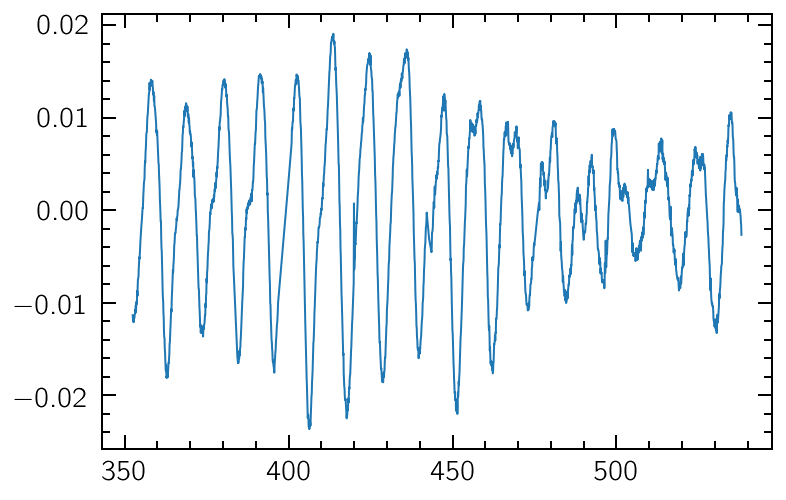

In [22]:
t, y, dy = lightcurve2()
plt.plot(t, y)

In [23]:
periods = np.logspace(0, 7, 1000, base=2)

## Plotting the Wavelet Power Spectrum

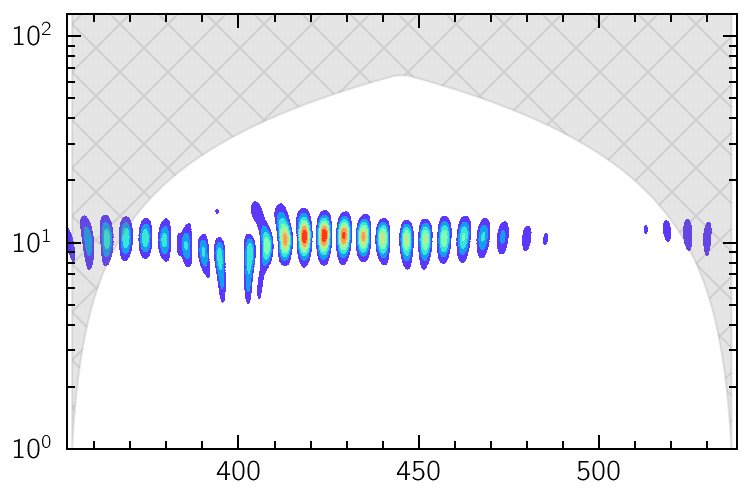

In [34]:
power, coi, mask_coi = wavelet(t, y, periods)
cmap = plt.cm.get_cmap('rainbow')
cmap.set_under('w')
plt.contourf(t, periods, power, cmap=cmap, extend='min')
plt.fill_between(coi[0], coi[1], periods.max(), hatch='x', color='grey', alpha=0.2)
plt.yscale('log')

In [25]:
mask_power = np.ma.masked_array(power, ~mask_coi)

## The Scale Average Variance (SAV)

(0.0, 0.005173076983667759)

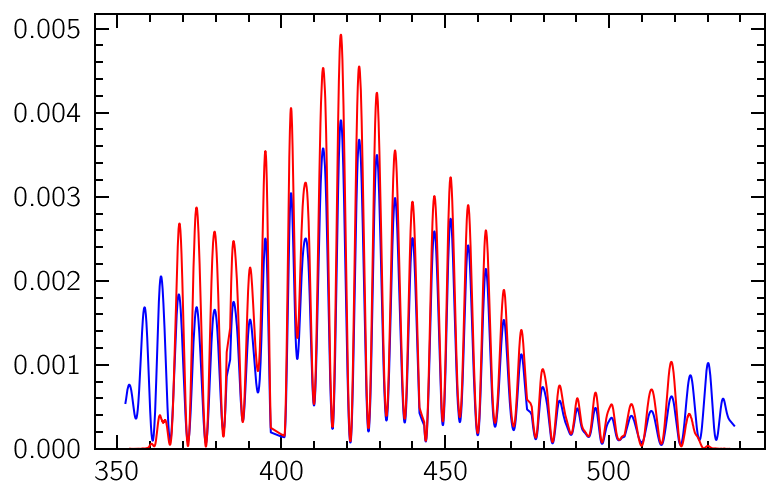

In [35]:
sav = np.mean(power, axis=0)
mask_sav = np.mean(mask_power, axis=0)
plt.plot(t, sav, 'b')
plt.plot(t, mask_sav, 'r')
plt.ylim(0)

## The Global Wavelet Power Spectrum

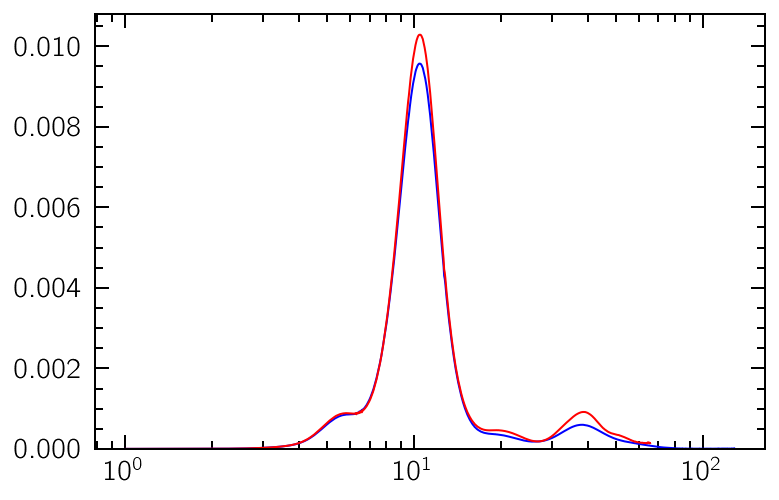

In [28]:
gwps = np.mean(power, axis=1)
mask_gwps = np.mean(mask_power, axis=1)
plt.plot(periods, gwps, 'b')
plt.plot(periods, mask_gwps, 'r')
plt.ylim(0)
plt.xscale('log')

In [29]:
print(periods[gwps.argmax()], periods[mask_gwps.argmax()])

10.391826740281603 10.442421436960762
